#### 대한민국 년별 평균기온 변화(증감률)와 농작물 피해보험 규모 분석
* 농작물 재해보험: 
					* 년도:		2018 ~ 2022년
					* 분야: 	밭,과수,시설,식량,임산물,특작물
					* 분야별:	가입농가, 가입면적, 지급건수, 지급대상면적, 지급액
* 년별 평균 기온 :
					* 평균기온, 평균최저기온, 평균최고기온
					
* 년별 강수량? 폭염? 열대야? 

#### 년별 평균 기온 그래프 plot

In [ ]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import tabulate
import numpy as np

In [ ]:
raw_temp_df = pd.read_csv("년도별_평균기온.xls", encoding='euc_kr', header=6, delimiter='\t')
raw_temp_df

In [ ]:
print(raw_temp_df.info())

In [ ]:
# 지점 칼럼 삭제
raw_temp_df.drop('지점', axis=1, inplace=True)
raw_temp_df

In [ ]:
raw_temp_df.columns

In [ ]:
# 데이터프레임 컬럼 이름 변경
# 년: year, '평균기온(℃)': ave_temp, '평균최저기온(℃)': min_temp, '평균최고기온(℃)': max_temp
raw_temp_df.rename(columns={'년': 'year', '평균기온(℃)': 'ave_temp', 
                            '평균최저기온(℃)': 'min_temp', '평균최고기온(℃)': 'max_temp'}, inplace=True)
raw_temp_df.columns

In [ ]:
# 2018 ~ 2022년 DF 추출
source_DF = raw_temp_df.iloc[8:13]
source_DF

In [ ]:
# 그래프 plot
plt.figure(figsize=(8,6))

x = source_DF['year']

temp_y1 = source_DF['ave_temp']
temp_y2 = source_DF['min_temp']
temp_y3 = source_DF['max_temp']

plt.plot(x,temp_y1, label='평균기온', marker='o', ms=4, color='k')
plt.plot(x,temp_y2, label='평균최저기온', marker='s',color='blue')
plt.plot(x,temp_y3, label='평균최고기온', marker='s', color='red')

plt.title("2018 - 2022 년별 평균기온 변화")
plt.xticks(x, labels=range(2018,2023))
plt.ylim(bottom=0, top=22)
plt.legend(loc=4)
plt.show()

#### 농작물 재해보험 
* 항목: 밭, 과수, 시설, 식량, 임산물, 특작물
* 밭: field
* 과수: fruits
* 시설: facility
* 식량: food
* 임산물: forestry
* 특작물: special


In [ ]:
# raw_temp_df = pd.read_csv("년도별_평균기온.xls", encoding='euc_kr', header=6, delimiter='\t')
raw_insurance = pd.read_excel('농작물_재해보험.xlsx', engine='openpyxl', header=[0,1,2])
raw_insurance.head(3)
# print(tabulate( raw_insurance.head(), header='keys', tablefmt='psql'))

In [ ]:
print(raw_insurance.columns)

#### '-' --> 0 처리

In [ ]:
raw_insurance.replace('-',0, inplace=True)

In [ ]:
# 출처: https://steadiness-193.tistory.com/90 
# * 항목: 밭, 과수, 시설, 식량, 임산물, 특작물
# * 밭: field
# * 과수: fruits
# * 시설: facility
# * 식량: food
# * 임산물: forestry
# * 특작물: special
df_name_list = ['field','fruits','facility','food','forestry','special']
col_list = ['밭','과수','시설','식량','임산물','특작물']

# 밭 DF
field = raw_insurance.reindex(['밭'], axis=1, level=1).iloc[0]
field = field.to_frame().T

# 과수 DF
fruits = raw_insurance.reindex(['과수'], axis=1, level=1).iloc[0]
fruits = fruits.to_frame().T

# 시설 DF
facility = raw_insurance.reindex(['시설'], axis=1, level=1).iloc[0]
facility = facility.to_frame().T

# 식량 DF
food = raw_insurance.reindex(['식량'], axis=1, level=1).iloc[0]
food = food.to_frame().T

# 임산물 DF
forestry = raw_insurance.reindex(['임산물'], axis=1, level=1).iloc[0]
forestry = forestry.to_frame().T

# 특작물 DF
special = raw_insurance.reindex(['특작물'], axis=1, level=1).iloc[0]
special = special.to_frame().T

In [ ]:
special

In [ ]:
print(field.info())
field

In [ ]:
# DF 데이터 타입 object -> int64
field = field.astype('int64')
field.dtypes

In [ ]:
# 밭 보험 가입자 수
# field
plt.figure(figsize=(10,6))

year = [2018,2019,2020,2021,2022]
X_axis = range(len(x))
Wi = 0.4

y1 = field.reindex( ['가입농가 (가구)'], axis=1, level=2).iloc[0].to_list()
# y2 = field.reindex( ['가입면적 (㎡)'], axis=1, level=2).iloc[0].to_list()

fig, ax1 = plt.subplots()

fig.suptitle('밭 보험 가입 가구 수', fontsize=16)
rects = ax1.bar(year, y1,  width=Wi, label='가입가구 수', color='royalblue')
ax1.bar_label(rects, padding=3)
ax1.set_ylim(bottom=0, top=max(y1)+10**4.2)
ax1.legend(loc=1)

ax2 = ax1.twinx()
ttt = ax2.plot(year, temp_y3, marker='o', color='red', label='전국 평균 최고기온')
ax2.set_ylabel('온도', fontsize=12)
ax2.set_ylim(bottom=15, top=20)
ax2.legend(loc=2)

plt.show()

In [ ]:
# 밭 보험 가입면적 
# field
plt.figure(figsize=(10,6))

year = [2018,2019,2020,2021,2022]
X_axis = range(len(x))
Wi = 0.4

y2 = field.reindex( ['지급액 (백만원)'], axis=1, level=2).iloc[0].to_list() 

fig, ax1 = plt.subplots()

fig.suptitle('밭 보험 지급액', fontsize=16)
rects = ax1.bar(year, y2, width=Wi, label='지급액 (백만원)', color='gold')
ax1.bar_label(rects, padding=3)
ax1.set_ylim(bottom=0, top=max(y2)+10**3.3)
ax1.legend(loc=2)

ax2 = ax1.twinx()
ttt = ax2.plot(year, temp_y3, marker='o', color='red', label='전국 평균 기온')
ax2.set_ylabel('온도', fontsize=12)
ax2.set_ylim(bottom=15, top=20)
# ax2.legend(loc=2)

plt.show()

In [ ]:
field.reindex( ['가입면적 (㎡)'], axis=1, level=2).iloc[0].to_list()

In [ ]:
transform(field.reindex( ['가입면적 (㎡)'], axis=1, level=2).iloc[0].to_list())

In [ ]:
# 밭 보험 가입 면적
# field

def transform(xx):
    
	for idx in range(len(xx)):
		# xx[idx] = round( xx[idx] / 10**6,  2)
		xx[idx] = xx[idx] * 0.3025 / 100			# [백평 단위]

	return xx

plt.figure(figsize=(10,6))

year = [2018,2019,2020,2021,2022]
X_axis = range(len(x))
Wi = 0.4

# y1 = field.reindex( ['가입농가 (가구)'], axis=1, level=2).iloc[0].to_list()
y2 = transform( field.reindex( ['가입면적 (㎡)'], axis=1, level=2).iloc[0].to_list() )

fig, ax1 = plt.subplots()

fig.suptitle('밭 보험 가입 면적', fontsize=16)
rects = ax1.bar(year, y2, width=Wi, label='가입 면적 (백평)', color='saddlebrown')
ax1.bar_label(rects,  fmt ='{:7.0f}' ,padding=3)
ax1.set_ylim(bottom=0, top=max(y2)+10**5)
ax1.legend(loc=2)

ax2 = ax1.twinx()
ttt = ax2.plot(year, temp_y3, marker='o', color='red', alpha=0.6)

ax2.set_ylim(bottom=15, top=20)
ax2.set_ylabel('온도', fontsize=12)
# ax2.legend(loc=2)

plt.show()

In [ ]:
area = transform( field.reindex( ['지급대상면적 (㎡)'], axis=1, level=2).iloc[0].to_list() )
bill = field.reindex( ['지급액 (백만원)'], axis=1, level=2).iloc[0].to_list()

In [ ]:
bill_per_area = [ b/a *1000000 for b,a in zip(bill,area)]
bill_per_area

In [ ]:
# 지급액 / 지급면적

area = transform( field.reindex( ['지급대상면적 (㎡)'], axis=1, level=2).iloc[0].to_list() )
bill = field.reindex( ['지급액 (백만원)'], axis=1, level=2).iloc[0].to_list()

bill_per_area = [ b/a *1000000 for b,a in zip(bill,area)]
print( bill_per_area )

# bill_per_area
plt.figure(figsize=(10,6))

year = [2018,2019,2020,2021,2022]
X_axis = range(len(x))
Wi = 0.4

y2 = bill_per_area

fig, ax1 = plt.subplots()

fig.suptitle('밭 면적 당(평) 지급액', fontsize=16)
rects = ax1.bar(year, y2, width=Wi, label='지급액 (원)', color='pink', zorder=-1)
ax1.bar_label(rects,  fmt ='{:6.0f}원', padding=3)
ax1.set_ylim(bottom=0, top=max(y2)+10**4.6)
ax1.legend(loc=2)

ax2 = ax1.twinx()
ttt = ax2.plot(year, temp_y3, marker='o', color='red')
ax2.set_ylabel('온도', fontsize=12)
ax2.set_ylim(bottom=15, top=20)

plt.show()


#### 

#### 과수

In [ ]:
# 과수 보험 가입자 수
# fruits
plt.figure(figsize=(10,6))

year = [2018,2019,2020,2021,2022]
X_axis = range(len(x))
Wi = 0.4

y1 = fruits.reindex( ['가입농가 (가구)'], axis=1, level=2).iloc[0].to_list()
# y2 = fruits.reindex( ['가입면적 (㎡)'], axis=1, level=2).iloc[0].to_list()

fig, ax1 = plt.subplots()

fig.suptitle('과수 보험 가입 가구 수', fontsize=16)
rects = ax1.bar(year, y1,  width=Wi, label='가입가구 수', color='royalblue')
ax1.bar_label(rects, padding=3)
ax1.set_ylim(bottom=0, top=max(y1)+10**4.2)
ax1.legend(loc=1)

ax2 = ax1.twinx()
ttt = ax2.plot(year, temp_y3, marker='o', color='red', label='전국 평균 최고기온')
ax2.set_ylabel('온도', fontsize=12)
ax2.set_ylim(bottom=15, top=20)
ax2.legend(loc=2)

plt.show()


# 과수 보험 지급액
# fruits
plt.figure(figsize=(10,6))

year = [2018,2019,2020,2021,2022]
X_axis = range(len(x))
Wi = 0.4

y2 = fruits.reindex( ['지급액 (백만원)'], axis=1, level=2).iloc[0].to_list() 

fig, ax1 = plt.subplots()

fig.suptitle('과수 보험 지급액', fontsize=16)
rects = ax1.bar(year, y2, width=Wi, label='지급액 (백만원)', color='gold')
ax1.bar_label(rects, padding=3)
ax1.set_ylim(bottom=0, top=max(y2)+10**3)
ax1.legend(loc=2)

ax2 = ax1.twinx()
ttt = ax2.plot(year, temp_y3, marker='o', color='red', label='전국 평균 기온')
ax2.set_ylabel('온도', fontsize=12)
ax2.set_ylim(bottom=15, top=20)


plt.show()


# 과수 보험 가입 면적
# fruits

def transform(xx):
    
	for idx in range(len(xx)):
		# xx[idx] = round( xx[idx] / 10**6,  2)
		xx[idx] = xx[idx] * 0.3025 / 100			# [백평 단위]

	return xx

plt.figure(figsize=(10,6))

year = [2018,2019,2020,2021,2022]
X_axis = range(len(x))
Wi = 0.4

y2 = transform( fruits.reindex( ['가입면적 (㎡)'], axis=1, level=2).iloc[0].to_list() )

fig, ax1 = plt.subplots()

fig.suptitle('과수 보험 가입 면적', fontsize=16)
rects = ax1.bar(year, y2, width=Wi, label='가입 면적 (백평)', color='saddlebrown')
ax1.bar_label(rects,  fmt ='{:8.0f}' ,padding=3)
ax1.set_ylim(bottom=0, top=max(y2)+10**6)
ax1.legend(loc=2)

ax2 = ax1.twinx()
ttt = ax2.plot(year, temp_y3, marker='o', color='red', alpha=0.6)

ax2.set_ylim(bottom=15, top=20)
ax2.set_ylabel('온도', fontsize=12)
# ax2.legend(loc=2)

plt.show()



# 지급액 / 지급면적

area = transform( fruits.reindex( ['지급대상면적 (㎡)'], axis=1, level=2).iloc[0].to_list() )
bill = fruits.reindex( ['지급액 (백만원)'], axis=1, level=2).iloc[0].to_list()

bill_per_area = [ b/a *1000000 for b,a in zip(bill,area)]
print( bill_per_area )

# bill_per_area
plt.figure(figsize=(10,6))

year = [2018,2019,2020,2021,2022]
X_axis = range(len(x))
Wi = 0.4

y2 = bill_per_area

fig, ax1 = plt.subplots()

fig.suptitle('과수 면적 당(평) 지급액', fontsize=16)
rects = ax1.bar(year, y2, width=Wi, label='지급액 (원)', color='pink', zorder=-1)
ax1.bar_label(rects,  fmt ='{:6.0f}원', padding=3)
ax1.set_ylim(bottom=0, top=max(y2)+10**5)
ax1.legend(loc=2)

ax2 = ax1.twinx()
ttt = ax2.plot(year, temp_y3, marker='o', color='red')
ax2.set_ylabel('온도', fontsize=12)
ax2.set_ylim(bottom=15, top=20)

plt.show()


In [ ]:
# 시설 보험 가입자 수
# facility
plt.figure(figsize=(10,6))

year = [2018,2019,2020,2021,2022]
X_axis = range(len(x))
Wi = 0.4

y1 = facility.reindex( ['가입농가 (가구)'], axis=1, level=2).iloc[0].to_list()
# y2 = facility.reindex( ['가입면적 (㎡)'], axis=1, level=2).iloc[0].to_list()

fig, ax1 = plt.subplots()

fig.suptitle('시설 보험 가입 가구 수', fontsize=16)
rects = ax1.bar(year, y1,  width=Wi, label='가입가구 수', color='royalblue')
ax1.bar_label(rects, padding=3)
ax1.set_ylim(bottom=0, top=max(y1)+10**4.2)
ax1.legend(loc=1)

ax2 = ax1.twinx()
ttt = ax2.plot(year, temp_y3, marker='o', color='red', label='전국 평균 최고기온')
ax2.set_ylabel('온도', fontsize=12)
ax2.set_ylim(bottom=15, top=20)
ax2.legend(loc=2)

plt.show()


# 시설 보험 지급액
# facility
plt.figure(figsize=(10,6))

year = [2018,2019,2020,2021,2022]
X_axis = range(len(x))
Wi = 0.4

y2 = facility.reindex( ['지급액 (백만원)'], axis=1, level=2).iloc[0].to_list() 

fig, ax1 = plt.subplots()

fig.suptitle('시설 보험 지급액', fontsize=16)
rects = ax1.bar(year, y2, width=Wi, label='지급액 (백만원)', color='gold')
ax1.bar_label(rects, padding=3)
ax1.set_ylim(bottom=0, top=max(y2)+10**2)
ax1.legend(loc=2)

ax2 = ax1.twinx()
ttt = ax2.plot(year, temp_y3, marker='o', color='red', label='전국 평균 기온')
ax2.set_ylabel('온도', fontsize=12)
ax2.set_ylim(bottom=15, top=20)


plt.show()


# 시설 보험 가입 면적
# facility

def transform(xx):
    
	for idx in range(len(xx)):
		# xx[idx] = round( xx[idx] / 10**6,  2)
		xx[idx] = xx[idx] * 0.3025 / 100			# [백평 단위]

	return xx

plt.figure(figsize=(10,6))

year = [2018,2019,2020,2021,2022]
X_axis = range(len(x))
Wi = 0.4

# y1 = facility.reindex( ['가입농가 (가구)'], axis=1, level=2).iloc[0].to_list()
y2 = transform( facility.reindex( ['가입면적 (㎡)'], axis=1, level=2).iloc[0].to_list() )

fig, ax1 = plt.subplots()

fig.suptitle('시설 보험 가입 면적', fontsize=16)
rects = ax1.bar(year, y2, width=Wi, label='가입 면적 (백평)', color='saddlebrown')
ax1.bar_label(rects,  fmt ='{:7.0f}' ,padding=3)
ax1.set_ylim(bottom=0, top=max(y2)+10**5)
ax1.legend(loc=2)

ax2 = ax1.twinx()
ttt = ax2.plot(year, temp_y3, marker='o', color='red', alpha=0.6)

ax2.set_ylim(bottom=15, top=20)
ax2.set_ylabel('온도', fontsize=12)
# ax2.legend(loc=2)

plt.show()



# 지급액 / 지급면적

area = transform( facility.reindex( ['지급대상면적 (㎡)'], axis=1, level=2).iloc[0].to_list() )
bill = facility.reindex( ['지급액 (백만원)'], axis=1, level=2).iloc[0].to_list()

bill_per_area = [ b/a *1000000 for b,a in zip(bill,area)]
print( bill_per_area )

# bill_per_area
plt.figure(figsize=(10,6))

year = [2018,2019,2020,2021,2022]
X_axis = range(len(x))
Wi = 0.4

y2 = bill_per_area

fig, ax1 = plt.subplots()

fig.suptitle('시설 면적 당(평) 지급액', fontsize=16)
rects = ax1.bar(year, y2, width=Wi, label='지급액 (원)', color='pink', zorder=-1)
ax1.bar_label(rects,  fmt ='{:6.0f}원', padding=3)
ax1.set_ylim(bottom=0, top=max(y2)+10**5.7)
ax1.legend(loc=2)

ax2 = ax1.twinx()
ttt = ax2.plot(year, temp_y3, marker='o', color='red')
ax2.set_ylabel('온도', fontsize=12)
ax2.set_ylim(bottom=15, top=20)

plt.show()


#### 식량

In [ ]:
# 식량 보험 가입자 수
# food
plt.figure(figsize=(10,6))

year = [2018,2019,2020,2021,2022]
X_axis = range(len(x))
Wi = 0.4

y1 = food.reindex( ['가입농가 (가구)'], axis=1, level=2).iloc[0].to_list()
# y2 = food.reindex( ['가입면적 (㎡)'], axis=1, level=2).iloc[0].to_list()

fig, ax1 = plt.subplots()

fig.suptitle('식량 보험 가입 가구 수', fontsize=16)
rects = ax1.bar(year, y1,  width=Wi, label='가입가구 수', color='royalblue')
ax1.bar_label(rects, padding=3)
ax1.set_ylim(bottom=0, top=max(y1)+10**4.8)
ax1.legend(loc=1)

ax2 = ax1.twinx()
ttt = ax2.plot(year, temp_y3, marker='o', color='red', label='전국 평균 최고기온')
ax2.set_ylabel('온도', fontsize=12)
ax2.set_ylim(bottom=15, top=20)
ax2.legend(loc=2)

plt.show()


# 식량 보험 지급액
# food
plt.figure(figsize=(10,6))

year = [2018,2019,2020,2021,2022]
X_axis = range(len(x))
Wi = 0.4

y2 = food.reindex( ['지급액 (백만원)'], axis=1, level=2).iloc[0].to_list() 

fig, ax1 = plt.subplots()

fig.suptitle('식량 보험 지급액', fontsize=16)
rects = ax1.bar(year, y2, width=Wi, label='지급액 (백만원)', color='gold')
ax1.bar_label(rects, padding=3)
ax1.set_ylim(bottom=0, top=max(y2)+10**3.8)
ax1.legend(loc=2)

ax2 = ax1.twinx()
ttt = ax2.plot(year, temp_y3, marker='o', color='red', label='전국 평균 기온')
ax2.set_ylabel('온도', fontsize=12)
ax2.set_ylim(bottom=15, top=20)


plt.show()


# 식량 보험 가입 면적
# food

def transform(xx):
    
	for idx in range(len(xx)):
		# xx[idx] = round( xx[idx] / 10**6,  2)
		xx[idx] = xx[idx] * 0.3025 / 100			# [백평 단위]

	return xx

plt.figure(figsize=(10,6))

year = [2018,2019,2020,2021,2022]
X_axis = range(len(x))
Wi = 0.4

# y1 = food.reindex( ['가입농가 (가구)'], axis=1, level=2).iloc[0].to_list()
y2 = transform( food.reindex( ['가입면적 (㎡)'], axis=1, level=2).iloc[0].to_list() )

fig, ax1 = plt.subplots()

fig.suptitle('식량 보험 가입 면적', fontsize=16)
rects = ax1.bar(year, y2, width=Wi, label='가입 면적 (백평)', color='saddlebrown')
ax1.bar_label(rects,  fmt ='{:7.0f}' ,padding=3)
ax1.set_ylim(bottom=0, top=max(y2)+10**6.6)
ax1.legend(loc=2)

ax2 = ax1.twinx()
ttt = ax2.plot(year, temp_y3, marker='o', color='red', alpha=0.6)

ax2.set_ylim(bottom=15, top=20)
ax2.set_ylabel('온도', fontsize=12)
# ax2.legend(loc=2)

plt.show()



# 지급액 / 지급면적

area = transform( food.reindex( ['지급대상면적 (㎡)'], axis=1, level=2).iloc[0].to_list() )
bill = food.reindex( ['지급액 (백만원)'], axis=1, level=2).iloc[0].to_list()

bill_per_area = [ b/a *1000000 for b,a in zip(bill,area)]
print( bill_per_area )

# bill_per_area
plt.figure(figsize=(10,6))

year = [2018,2019,2020,2021,2022]
X_axis = range(len(x))
Wi = 0.4

y2 = bill_per_area

fig, ax1 = plt.subplots()

fig.suptitle('식량 면적 당(평) 지급액', fontsize=16)
rects = ax1.bar(year, y2, width=Wi, label='지급액 (원)', color='pink', zorder=-1)
ax1.bar_label(rects,  fmt ='{:6.0f}원', padding=3)
ax1.set_ylim(bottom=0, top=max(y2)+10**4.8)
ax1.legend(loc=2)

ax2 = ax1.twinx()
ttt = ax2.plot(year, temp_y3, marker='o', color='red')
ax2.set_ylabel('온도', fontsize=12)
ax2.set_ylim(bottom=15, top=20)

plt.show()


#### 임산물

In [ ]:
# 임산물 보험 가입자 수
# forestry
plt.figure(figsize=(10,6))

year = [2018,2019,2020,2021,2022]
X_axis = range(len(x))
Wi = 0.4

y1 = forestry.reindex( ['가입농가 (가구)'], axis=1, level=2).iloc[0].to_list()
# y2 = forestry.reindex( ['가입면적 (㎡)'], axis=1, level=2).iloc[0].to_list()

fig, ax1 = plt.subplots()

fig.suptitle('임산물 보험 가입 가구 수', fontsize=16)
rects = ax1.bar(year, y1,  width=Wi, label='가입가구 수', color='royalblue')
ax1.bar_label(rects, padding=3)
ax1.set_ylim(bottom=0, top=max(y1)+10**3.4)
ax1.legend(loc=1)

ax2 = ax1.twinx()
ttt = ax2.plot(year, temp_y3, marker='o', color='red', label='전국 평균 최고기온')
ax2.set_ylabel('온도', fontsize=12)
ax2.set_ylim(bottom=15, top=20)
ax2.legend(loc=2)

plt.show()


# 임산물 보험 지급액
# forestry
plt.figure(figsize=(10,6))

year = [2018,2019,2020,2021,2022]
X_axis = range(len(x))
Wi = 0.4

y2 = forestry.reindex( ['지급액 (백만원)'], axis=1, level=2).iloc[0].to_list() 

fig, ax1 = plt.subplots()

fig.suptitle('임산물 보험 지급액', fontsize=16)
rects = ax1.bar(year, y2, width=Wi, label='지급액 (백만원)', color='gold')
ax1.bar_label(rects, padding=3)
ax1.set_ylim(bottom=0, top=max(y2)+10**3.3)
ax1.legend(loc=2)

ax2 = ax1.twinx()
ttt = ax2.plot(year, temp_y3, marker='o', color='red', label='전국 평균 기온')
ax2.set_ylabel('온도', fontsize=12)
ax2.set_ylim(bottom=15, top=20)


plt.show()


# 임산물 보험 가입 면적
# forestry

def transform(xx):
    
	for idx in range(len(xx)):
		# xx[idx] = round( xx[idx] / 10**6,  2)
		xx[idx] = xx[idx] * 0.3025 / 100			# [백평 단위]

	return xx

plt.figure(figsize=(10,6))

year = [2018,2019,2020,2021,2022]
X_axis = range(len(x))
Wi = 0.4

# y1 = forestry.reindex( ['가입농가 (가구)'], axis=1, level=2).iloc[0].to_list()
y2 = transform( forestry.reindex( ['가입면적 (㎡)'], axis=1, level=2).iloc[0].to_list() )

fig, ax1 = plt.subplots()

fig.suptitle('임산물 보험 가입 면적', fontsize=16)
rects = ax1.bar(year, y2, width=Wi, label='가입 면적 (백평)', color='saddlebrown')
ax1.bar_label(rects,  fmt ='{:7.0f}' ,padding=3)
ax1.set_ylim(bottom=0, top=max(y2)+10**5)
ax1.legend(loc=2)

ax2 = ax1.twinx()
ttt = ax2.plot(year, temp_y3, marker='o', color='red', alpha=0.6)

ax2.set_ylim(bottom=15, top=20)
ax2.set_ylabel('온도', fontsize=12)
# ax2.legend(loc=2)

plt.show()



# 지급액 / 지급면적

area = transform( forestry.reindex( ['지급대상면적 (㎡)'], axis=1, level=2).iloc[0].to_list() )
bill = forestry.reindex( ['지급액 (백만원)'], axis=1, level=2).iloc[0].to_list()

bill_per_area = [ b/a *1000000 for b,a in zip(bill,area)]
print( bill_per_area )

# bill_per_area
plt.figure(figsize=(10,6))

year = [2018,2019,2020,2021,2022]
X_axis = range(len(x))
Wi = 0.4

y2 = bill_per_area

fig, ax1 = plt.subplots()

fig.suptitle('임산물 면적 당(평) 지급액', fontsize=16)
rects = ax1.bar(year, y2, width=Wi, label='지급액 (원)', color='pink', zorder=-1)
ax1.bar_label(rects,  fmt ='{:6.0f}원', padding=3)
ax1.set_ylim(bottom=0, top=max(y2)+10**5.3)
ax1.legend(loc=2)

ax2 = ax1.twinx()
ttt = ax2.plot(year, temp_y3, marker='o', color='red')
ax2.set_ylabel('온도', fontsize=12)
ax2.set_ylim(bottom=15, top=20)

plt.show()


#### 특산물  --> 빼기

<Figure size 1000x600 with 0 Axes>

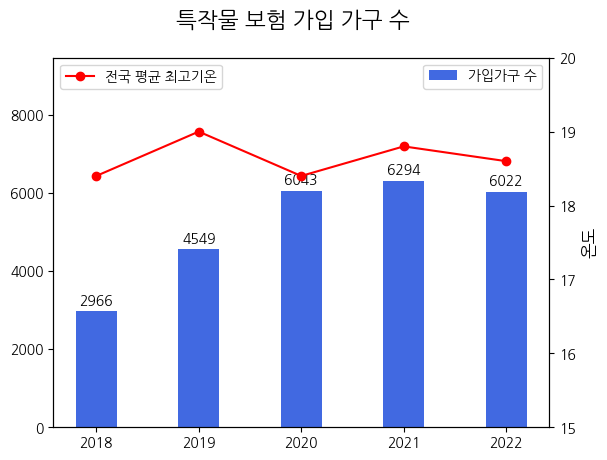

<Figure size 1000x600 with 0 Axes>

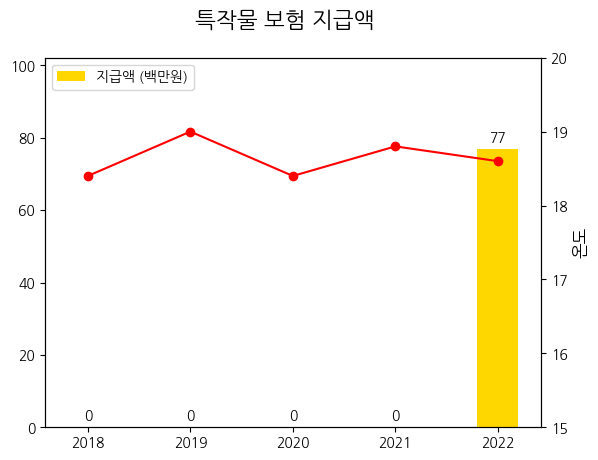

<Figure size 1000x600 with 0 Axes>

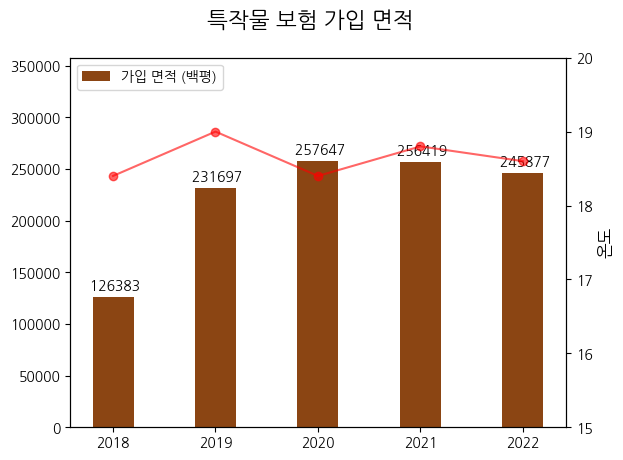

[0.0, 0.0, 0.0, 0.0, 436.18080000000003]
[0.0, 0.0, 0.0, 0.0, 77.0]


<Figure size 1000x600 with 0 Axes>

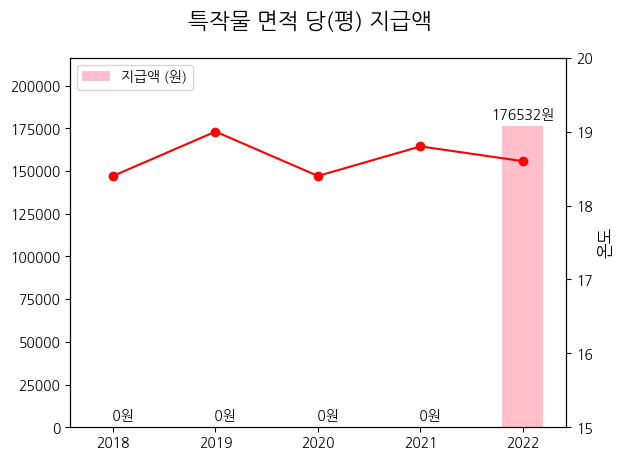

In [368]:
# 특작물 보험 가입자 수
# special
plt.figure(figsize=(10,6))

year = [2018,2019,2020,2021,2022]
X_axis = range(len(x))
Wi = 0.4

y1 = special.reindex( ['가입농가 (가구)'], axis=1, level=2).iloc[0].to_list()
# y2 = special.reindex( ['가입면적 (㎡)'], axis=1, level=2).iloc[0].to_list()

fig, ax1 = plt.subplots()

fig.suptitle('특작물 보험 가입 가구 수', fontsize=16)
rects = ax1.bar(year, y1,  width=Wi, label='가입가구 수', color='royalblue')
ax1.bar_label(rects, padding=3)
ax1.set_ylim(bottom=0, top=max(y1)+10**3.5)
ax1.legend(loc=1)

ax2 = ax1.twinx()
ttt = ax2.plot(year, temp_y3, marker='o', color='red', label='전국 평균 최고기온')
ax2.set_ylabel('온도', fontsize=12)
ax2.set_ylim(bottom=15, top=20)
ax2.legend(loc=2)

plt.show()


# 특작물 보험 지급액
# special
plt.figure(figsize=(10,6))

year = [2018,2019,2020,2021,2022]
X_axis = range(len(x))
Wi = 0.4

y2 = special.reindex( ['지급액 (백만원)'], axis=1, level=2).iloc[0].to_list() 

fig, ax1 = plt.subplots()

fig.suptitle('특작물 보험 지급액', fontsize=16)
rects = ax1.bar(year, y2, width=Wi, label='지급액 (백만원)', color='gold')
ax1.bar_label(rects, padding=3)
ax1.set_ylim(bottom=0, top=max(y2)+10**1.4)
ax1.legend(loc=2)

ax2 = ax1.twinx()
ttt = ax2.plot(year, temp_y3, marker='o', color='red', label='전국 평균 기온')
ax2.set_ylabel('온도', fontsize=12)
ax2.set_ylim(bottom=15, top=20)


plt.show()


# 특작물 보험 가입 면적
# special

def transform(xx):
    
	for idx in range(len(xx)):
		# xx[idx] = round( xx[idx] / 10**6,  2)
		xx[idx] = xx[idx] * 0.3025 / 100			# [백평 단위]

	return xx

plt.figure(figsize=(10,6))

year = [2018,2019,2020,2021,2022]
X_axis = range(len(x))
Wi = 0.4

# y1 = special.reindex( ['가입농가 (가구)'], axis=1, level=2).iloc[0].to_list()
y2 = transform( special.reindex( ['가입면적 (㎡)'], axis=1, level=2).iloc[0].to_list() )

fig, ax1 = plt.subplots()

fig.suptitle('특작물 보험 가입 면적', fontsize=16)
rects = ax1.bar(year, y2, width=Wi, label='가입 면적 (백평)', color='saddlebrown')
ax1.bar_label(rects,  fmt ='{:7.0f}' ,padding=3)
ax1.set_ylim(bottom=0, top=max(y2)+10**5)
ax1.legend(loc=2)

ax2 = ax1.twinx()
ttt = ax2.plot(year, temp_y3, marker='o', color='red', alpha=0.6)

ax2.set_ylim(bottom=15, top=20)
ax2.set_ylabel('온도', fontsize=12)
# ax2.legend(loc=2)

plt.show()



# 지급액 / 지급면적

# area = transform( special.reindex( ['지급대상면적 (㎡)'], axis=1, level=2).iloc[0].to_list() )
# bill = special.reindex( ['지급액 (백만원)'], axis=1, level=2).iloc[0].to_list()

# bill_per_area = [ b/a *1000000 for b,a in zip(bill,area)]
# print( bill_per_area )

area = transform( special.reindex( ['지급대상면적 (㎡)'], axis=1, level=2).iloc[0].to_list() )
bill = special.reindex( ['지급액 (백만원)'], axis=1, level=2).iloc[0].to_list()
print(area)
print(bill)

bill_per_area = [0]*5
bill_per_area[-1] = bill[-1]/area[-1] *1000000

# bill_per_area
plt.figure(figsize=(10,6))

year = [2018,2019,2020,2021,2022]
X_axis = range(len(x))
Wi = 0.4

y2 = bill_per_area

fig, ax1 = plt.subplots()

fig.suptitle('특작물 면적 당(평) 지급액', fontsize=16)
rects = ax1.bar(year, y2, width=Wi, label='지급액 (원)', color='pink', zorder=-1)
ax1.bar_label(rects,  fmt ='{:6.0f}원', padding=3)
ax1.set_ylim(bottom=0, top=max(y2)+10**4.6)
ax1.legend(loc=2)

ax2 = ax1.twinx()
ttt = ax2.plot(year, temp_y3, marker='o', color='red')
ax2.set_ylabel('온도', fontsize=12)
ax2.set_ylim(bottom=15, top=20)

plt.show()


In [ ]:
# 기온변화 & 가입농가 수(#) & 가입면적(m^2) plot
# 기온변화 -> 선그래프
# 가입농가 수(#) & 가입면적(m^2) -> bar graph
import numpy as np

def transform(xx):
    
	for idx in range(len(xx)):
		# xx[idx] = round( xx[idx] / 10**6,  2)
		xx[idx] = xx[idx] * 0.3025 / 100			# [백평 단위]

	return xx

# transform(raw_aa)

y1 = field.reindex( ['가입농가 (가구)'], axis=1, level=2).iloc[0].to_list()
y2 = transform( field.reindex( ['가입면적 (㎡)'], axis=1, level=2).iloc[0].to_list() )


# x축 데이터
year = (2018, 2019, 2020, 2021, 2022)

# y축 데이터
# join_num = {'가입가구 수': (field.reindex( ['가입농가 (가구)'], axis=1, level=2).iloc[0].to_list()),
#             '가입 면적': (field.reindex( ['가입면적 (㎡)'], axis=1, level=2).iloc[0].to_list() )
# 			 }

join_num = {'가입가구 수': (y1),
            '가입 면적': (y2 )
			 }

x = np.arange(len(year))
width=0.4
multiplier = 0

fig, ax = plt.subplots(figsize=(8,6))

for col, val in join_num.items():
	offset = width * multiplier
    
	rects = ax.bar(x+offset, col, width, label=val)
	ax.bar_label(rects)
	multiplier+=1

ax.set_xticks(x+width, year)


In [363]:
area = transform( special.reindex( ['지급대상면적 (㎡)'], axis=1, level=2).iloc[0].to_list() )
bill = special.reindex( ['지급액 (백만원)'], axis=1, level=2).iloc[0].to_list()
print(area)
print(bill)

bill_per_area = [0]*5
bill_per_area[-1] = bill[-1]/area[-1] *1000000
print( bill_per_area )

[0.0, 0.0, 0.0, 0.0, 436.18080000000003]
[0.0, 0.0, 0.0, 0.0, 77.0]
[0, 0, 0, 0, 176532.30036718718]
